In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

1. Data Cleaning

In [ ]:
null_counts=df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_percentages

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#remaning the v1 as the target and v2 as the text

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
368,ham,Wat uniform? In where get?
4445,ham,Merry christmas to u too annie!
5429,ham,"Er yeah, i will b there at 15:26, sorry! Just ..."
3873,ham,No. Did you multimedia message them or e-mail?
4120,ham,Yunny... I'm goin to be late


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

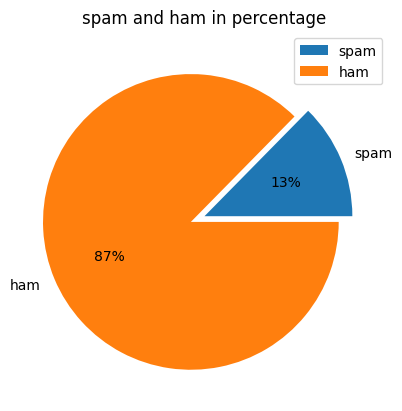

In [ ]:
#checking the percentage of spam and ham in the give dataset
msg_count = [df[df['target']=='spam'].shape[0],df[df['target']=='ham'].shape[0]]
labels = ["spam","ham"]
plt.pie(x=msg_count,explode = [0,0.1],labels=labels,autopct='%.0f%%')
plt.title("spam and ham in percentage")
plt.legend()
plt.show()

Natural Language Processing
here we need to precess text data column and column Target can be processed with just labeling it.


In [ ]:
import nltk
import re
from urllib.parse import urlparse
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database
nltk.download('wordnet')
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

1) Text Processing

In [ ]:
def textPocess(sms):
    try:
        # brackets replacing by space
        sms = re.sub('[][)(]',' ',sms)

        # url removing
        sms = [word for word in sms.split() if not urlparse(word).scheme]
        sms = ' '.join(sms)

        # removing words starts from @
        sms = re.sub(r'\@\w+','',sms)

        # removing html tags
        sms = re.sub(re.compile("<.*?>"),'',sms)

        # getting only characters and numbers
        sms = re.sub('[^A-Za-z0-9]',' ',sms)

        # make all words into lowercase
        sms = sms.lower()

        # word tokennization
        tokens = word_tokenize(sms,language='english')

        # removing whitespaces
        sms = [word.strip() for word in tokens]

        # removing word and number combinations or numbers
        sms = [word for word in sms if not re.search('\d.',word)]

        # stopwords removing
        sms = [word for word in sms if word not in stop_words]

        # lemmatization
        sms = [lemmatizer.lemmatize(word) for word in sms]
        sms = ' '.join(sms)

        return sms
    except Exception as e:
        print("sms",sms)
        print("Error",e)
        return 0


In [ ]:
df['processed'] = df['text'].apply(lambda sms: textPocess(sms))

In [ ]:
encoder = LabelEncoder()
df['encoded'] = encoder.fit_transform(df['target'])
df.head()

,target,text,processed,encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,0


 2) Word cloud

In [ ]:
from wordcloud import WordCloud
spam_df = df[df['target']=='spam']
ham_df = df[df['target']=='ham']

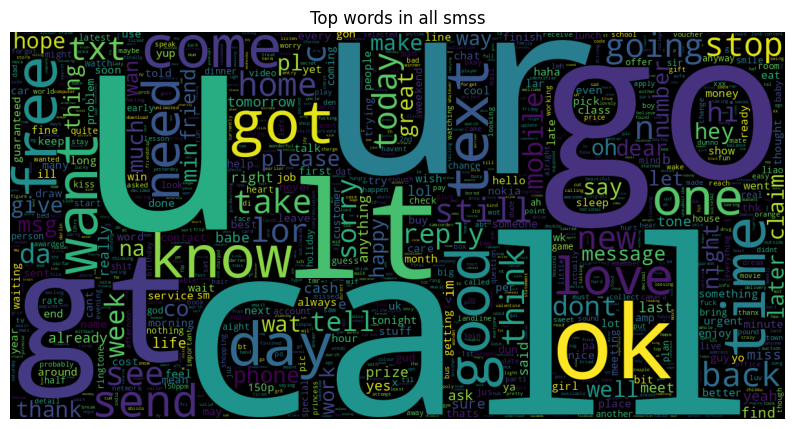

In [ ]:
wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

text_data = [data for data in df['processed']]
text_data = ' '.join(text_data)
wc.generate(text_data)
plt.figure(figsize=[10,7])
plt.title("Top words in all smss")
plt.imshow(wc)
plt.axis('off')
plt.show()

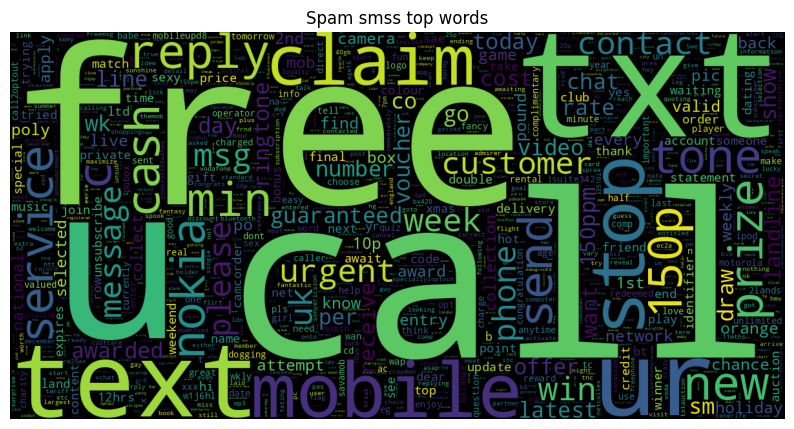

In [ ]:
text_data = [data for data in spam_df['processed']]
text_data = ' '.join(text_data)
wc.generate(text_data)
plt.figure(figsize=[10,7])
plt.title("Spam smss top words")
plt.imshow(wc)
plt.axis('off')
plt.show()

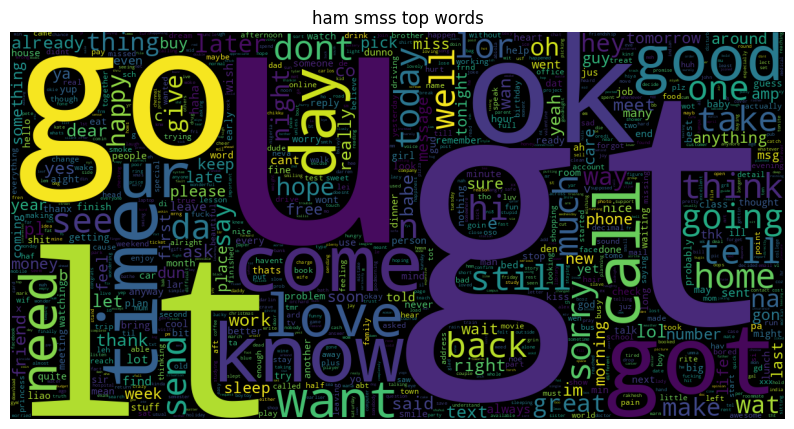

In [ ]:
text_data = [data for data in ham_df['processed']]
text_data = ' '.join(text_data)
wc.generate(text_data)
plt.figure(figsize=[10,7])
plt.title("ham smss top words")
plt.imshow(wc)
plt.axis('off')
plt.show()

 3) Vectorizing words from smss


3.1 Bag of Words



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
MIN_DF = 10

In [ ]:
bow_vec = CountVectorizer(min_df=MIN_DF)
bow_vec_class = bow_vec.fit_transform(df['processed'])
bow_vec_arr = bow_vec_class.toarray()
bow_df = pd.DataFrame(bow_vec_arr,columns=bow_vec.get_feature_names_out())
bow_df.head()

,000,03,04,08000839402,08000930705,10,100,1000,10p,11,...,yar,yeah,year,yep,yes,yesterday,yet,yo,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Building

4.1 spliting the Data set


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(bow_df,df['encoded'],stratify=df['encoded'])
print("X_train_b.shape,y_test_b.shape",X_train_b.shape,y_test_b.shape)

X_train_b.shape,y_test_b.shape (3876, 807) (1293,)


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train_b,y_train_b)
y_pred1 = gnb.predict(X_test_b)
print(accuracy_score(y_test_b,y_pred1))
print(confusion_matrix(y_test_b,y_pred1))
print(precision_score(y_test_b,y_pred1))

0.7563805104408353
[[825 305]
 [ 10 153]]
0.33406113537117904


In [ ]:
mnb.fit(X_train_b,y_train_b)
y_pred2 = gnb.predict(X_test_b)
print(accuracy_score(y_test_b,y_pred2))
print(confusion_matrix(y_test_b,y_pred2))
print(precision_score(y_test_b,y_pred2))

0.7563805104408353
[[825 305]
 [ 10 153]]
0.33406113537117904


In [ ]:
bnb.fit(X_train_b,y_train_b)
y_pred3 = bnb.predict(X_test_b)
print(accuracy_score(y_test_b,y_pred3))
print(confusion_matrix(y_test_b,y_pred3))
print(precision_score(y_test_b,y_pred3))


0.982985305491106
[[1126    4]
 [  18  145]]
0.9731543624161074


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
}

In [ ]:
def train_classifier(clf,X_train_b,y_train_b,X_test_b,y_test_b):
    clf.fit(X_train_b,y_train_b)
    y_pred = clf.predict(X_test_b)
    accuracy = accuracy_score(y_test_b,y_pred)
    precision = precision_score(y_test_b,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train_b,y_train_b,X_test_b,y_test_b)

(0.9358081979891725, 0.7857142857142857)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train_b,y_train_b,X_test_b,y_test_b)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9358081979891725
Precision -  0.7857142857142857
For  NB
Accuracy -  0.9791183294663574
Precision -  0.9047619047619048
For  DT
Accuracy -  0.9334880123743233
Precision -  0.9873417721518988
For  LR
Accuracy -  0.9806651198762568
Precision -  0.9662162162162162
For  RF
Accuracy -  0.9837587006960556
Precision -  0.9797297297297297


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
2,DT,0.933488,0.987342
4,RF,0.983759,0.979730
3,LR,0.980665,0.966216
1,NB,0.979118,0.904762
0,SVC,0.935808,0.785714


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.933488
1,RF,Accuracy,0.983759
2,LR,Accuracy,0.980665
3,NB,Accuracy,0.979118
4,SVC,Accuracy,0.935808
5,DT,Precision,0.987342
6,RF,Precision,0.979730
7,LR,Precision,0.966216
8,NB,Precision,0.904762
9,SVC,Precision,0.785714
